<a href="https://colab.research.google.com/github/maryamagahi/Playground/blob/main/EDA_FoodHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - FoodHub


### Context

FoodHub, a food aggregator company, streamlines the dining experience by providing access to multiple restaurants through a single smartphone app. The app facilitates direct online orders for customers, with assigned delivery personnel picking up confirmed orders from restaurants. Using a map, delivery personnel reach the restaurant, confirm the pick-up in the app, and proceed to the customer's location for delivery. After delivering the food package, the delivery person confirms the drop-off in the app. Customers can rate their orders within the app, while FoodHub generates revenue by collecting a fixed margin from the delivery orders placed at restaurants.

### Objective

FoodHub has stored various order data in its online portal. This notebook aims to analyze the data to identify opportunities for enhancing the customer experience on the platform.

### Data Dictionary

* **order_id:** Unique ID of the order
* **customer_id:** ID of the customer who ordered the food
* **restaurant_name:** Name of the restaurant
* **cuisine_type:** Cuisine ordered by the customer
* **cost:** Cost of the order
* **day_of_the_week:** Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating:** Rating given by the customer out of 5
* **food_preparation_time:** Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data




In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Notebooks/Raw Data/foodhub_order.csv') # read csv file
print('Data Shape:',df.shape) #returns shape of data
print()
print('First 5 Rows:')
print()
df.head() #returns the first 5 rows

Data Shape: (1898, 9)

First 5 Rows:



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.info() #returns concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.isnull().sum() #returns the missing value for each field

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.describe() #returns statistical summary of data

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
df['rating'].value_counts() #returns the count of records by rating

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [22]:
# print number of unique values for all IDs
print('The number of unique order IDs:',df['order_id'].nunique())
print('The number of unique customer IDs:',df['customer_id'].nunique())
print('The number of unique restaurant name:',df['restaurant_name'].nunique())
print('The number of unique cuisine type:',df['cuisine_type'].nunique())

The number of unique order IDs: 1898
The number of unique customer IDs: 1200
The number of unique restaurant name: 178
The number of unique cuisine type: 14


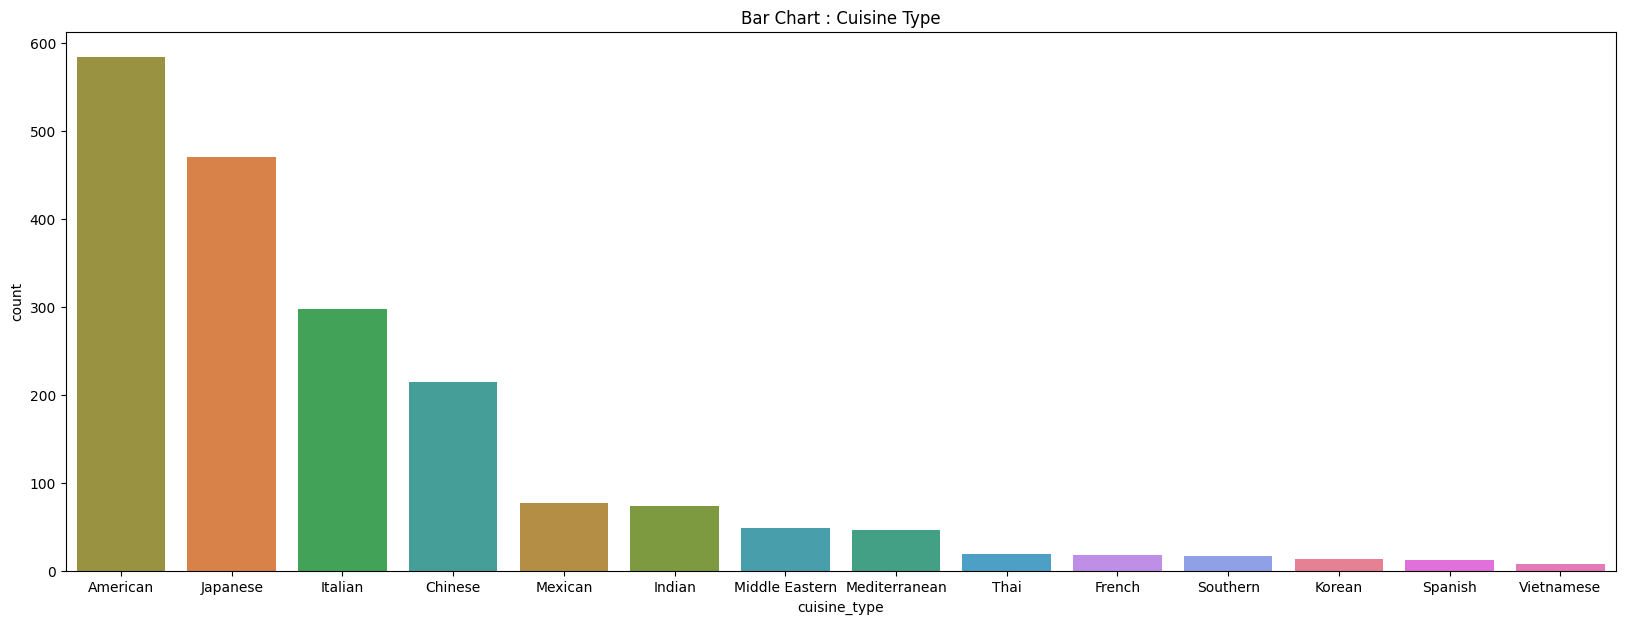

In [38]:
counts=df['cuisine_type'].value_counts()
plt.figure(figsize=(20,7))
plt.title('Bar Chart : Cuisine Type')
sns.countplot(data=df, x='cuisine_type', order=counts.index, hue='cuisine_type', legend=False);

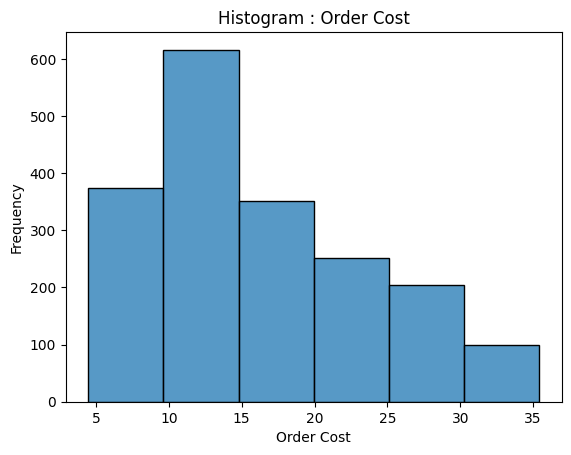

In [ ]:
plt.title('Histogram : Order Cost')
plt.xlabel('Order Cost')
plt.ylabel('Frequency')
sns.histplot(data=df, x='cost_of_the_order', bins=6);

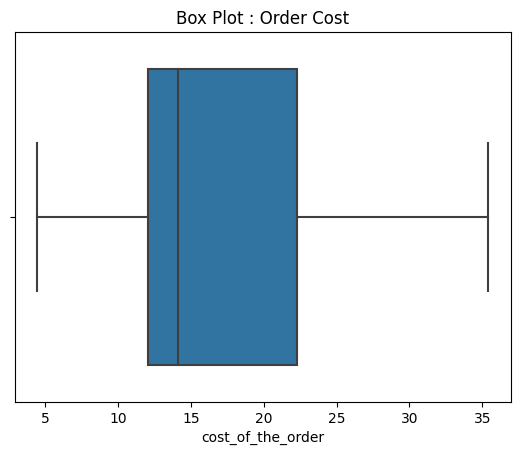

In [ ]:
plt.title('Box Plot : Order Cost')
plt.xlabel('Order Cost')
sns.boxplot(data=df, x='cost_of_the_order');

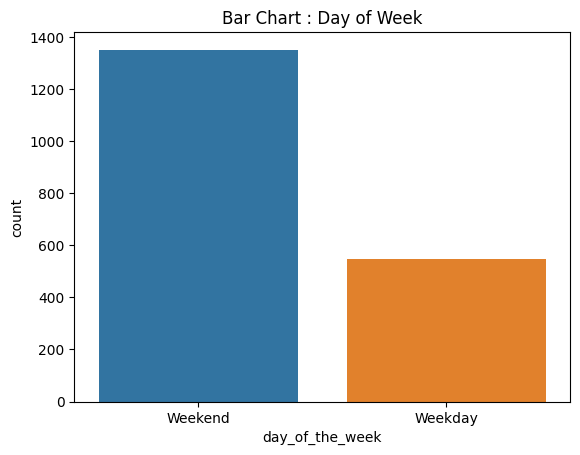

In [40]:
plt.title('Bar Chart : Day of Week')
sns.countplot(data=df, x='day_of_the_week',hue='day_of_the_week',legend=False);

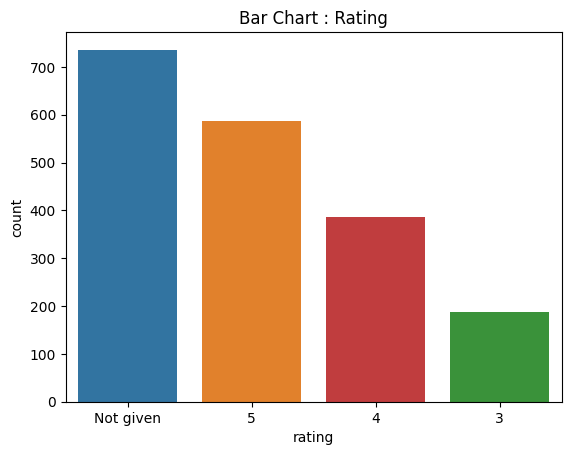

In [41]:
counts=df['rating'].value_counts()
plt.title('Bar Chart : Rating')
sns.countplot(data=df, x='rating',order=counts.index,hue='rating',legend=False);

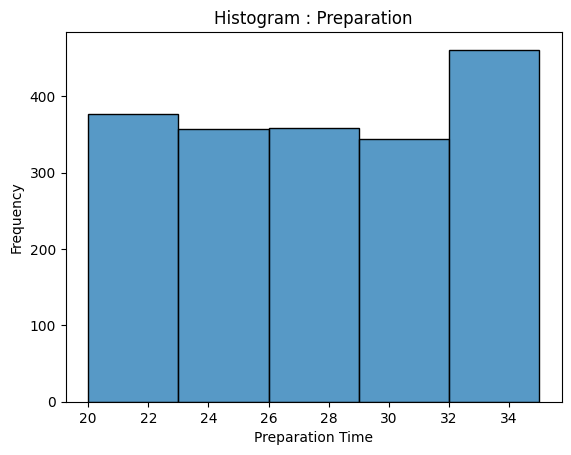

In [ ]:
plt.title('Histogram : Preparation')
plt.xlabel('Preparation Time')
plt.ylabel('Frequency')
sns.histplot(data=df, x='food_preparation_time', bins=5);

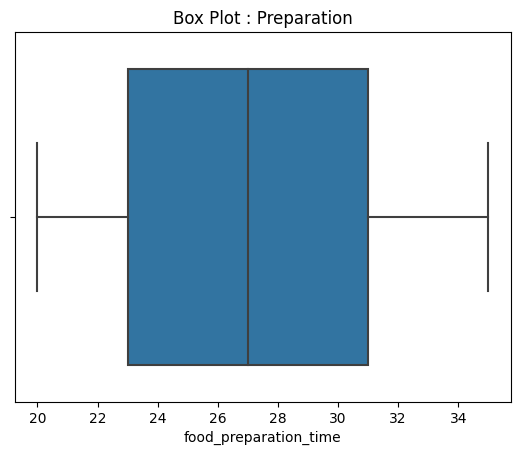

In [ ]:
plt.title('Box Plot : Preparation')
sns.boxplot(data=df, x='food_preparation_time');

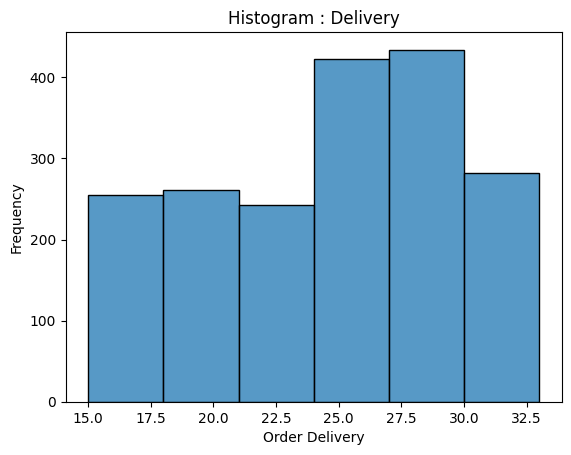

In [ ]:
plt.title('Histogram : Delivery')
plt.xlabel('Order Delivery')
plt.ylabel('Frequency')
sns.histplot(data=df, x='delivery_time', bins=6);

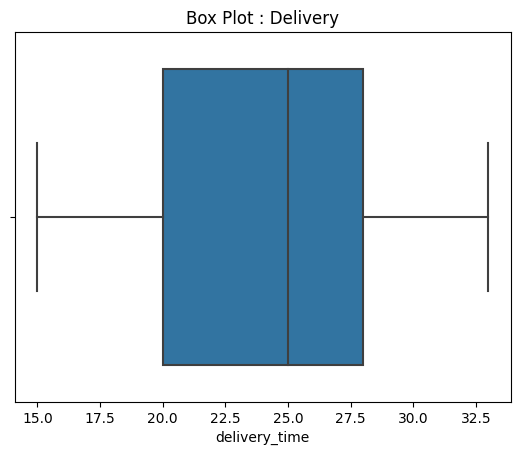

In [ ]:
plt.title('Box Plot : Delivery')
sns.boxplot(data=df, x='delivery_time');

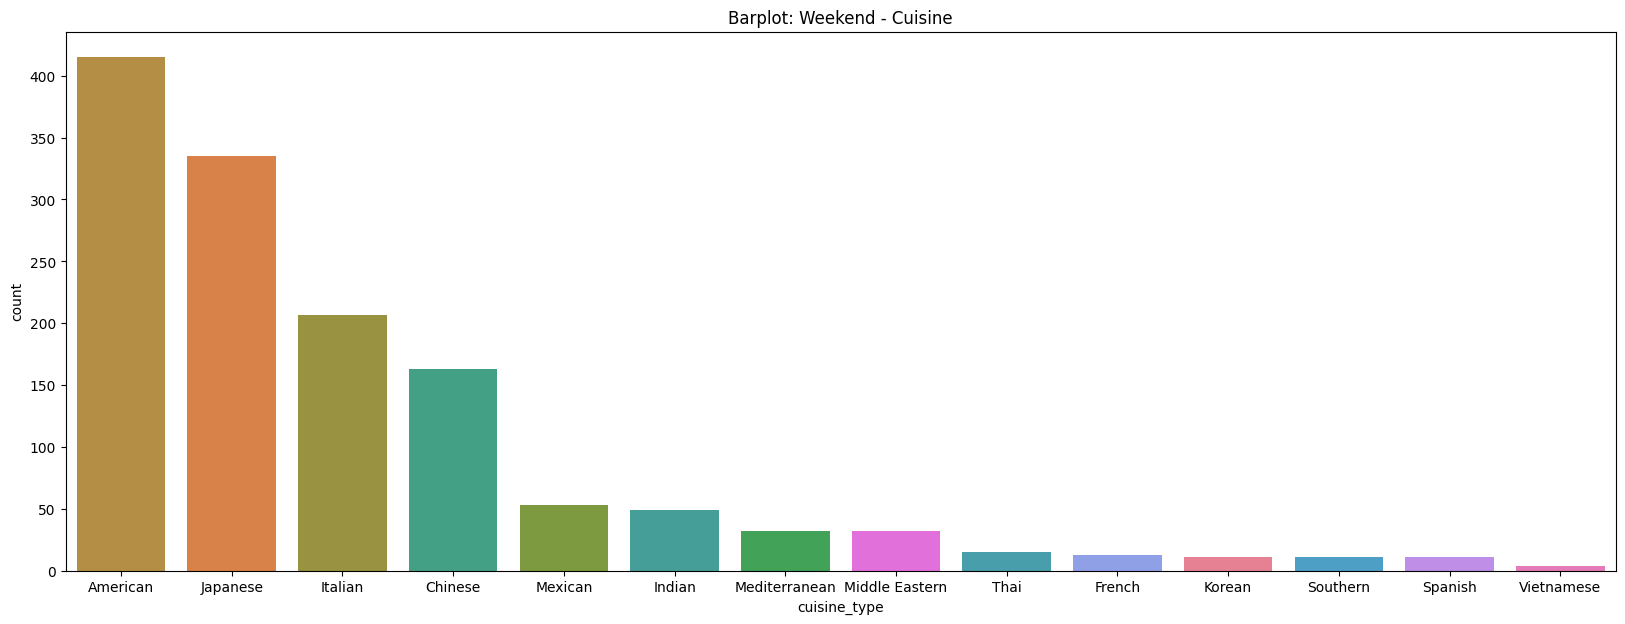

In [49]:
counts=df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()
plt.figure(figsize=(20,7))
plt.title('Barplot: Weekend - Cuisine')
sns.countplot(data=df[df['day_of_the_week']=='Weekend'], x='cuisine_type',order=counts.index,hue='cuisine_type')
plt.show()

### Multivariate Analysis

* All numerical variables are independent of each other.
* Cost of order, Food preparation time, and delivery time vary by cuisine_type. Additionally, delivery time varies by the day of the week.


#### 12.1. Numerical Variables Relationship


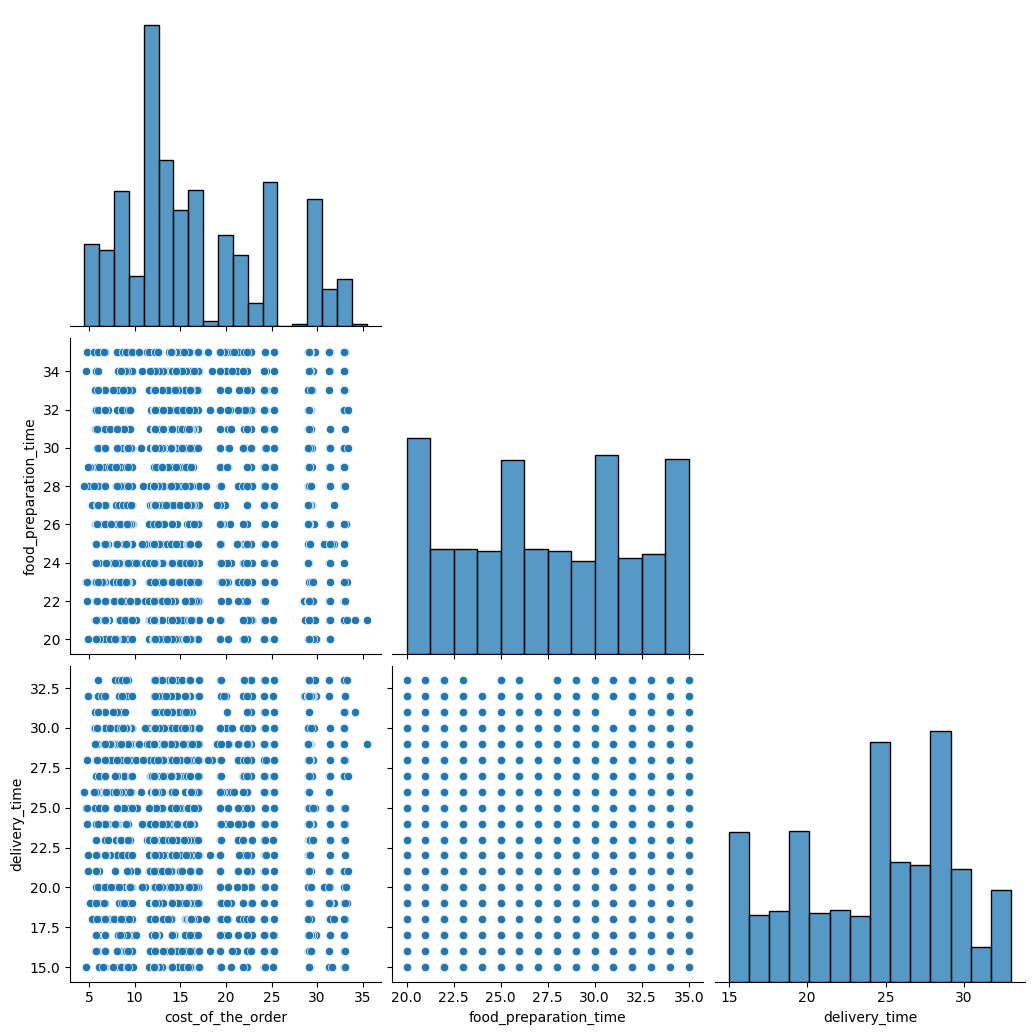

In [ ]:
# Pairplot to observe relationship between numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']], height=3.5, corner=True)
plt.show()

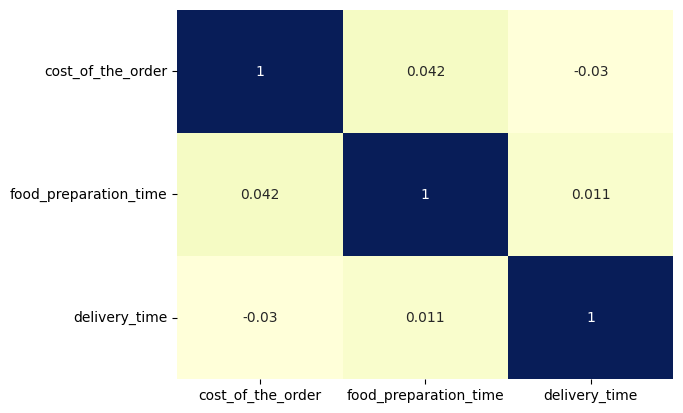

In [ ]:
# heatmap to calculate correlation between numerical variable
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cbar=False, cmap='YlGnBu');

#### 12.3. Numerical - Categorical Variables Relationship


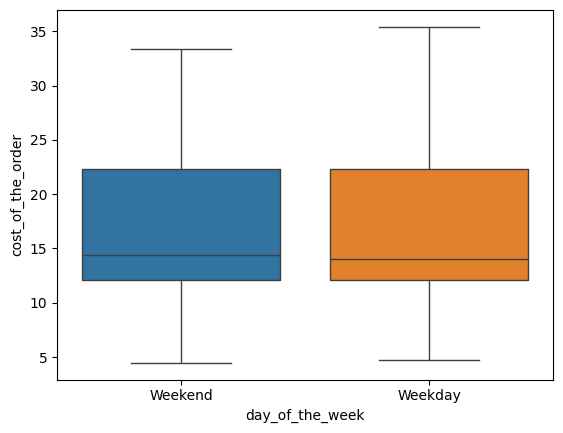

In [56]:
# box plot of cost of orders based on day of the week
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order',hue='day_of_the_week') ;

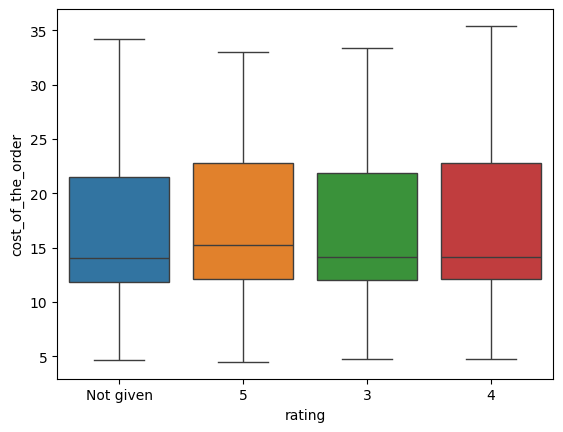

In [57]:
# box plot of cost of orders based on rating
sns.boxplot(data=df, x='rating', y='cost_of_the_order',hue='rating')
plt.show()

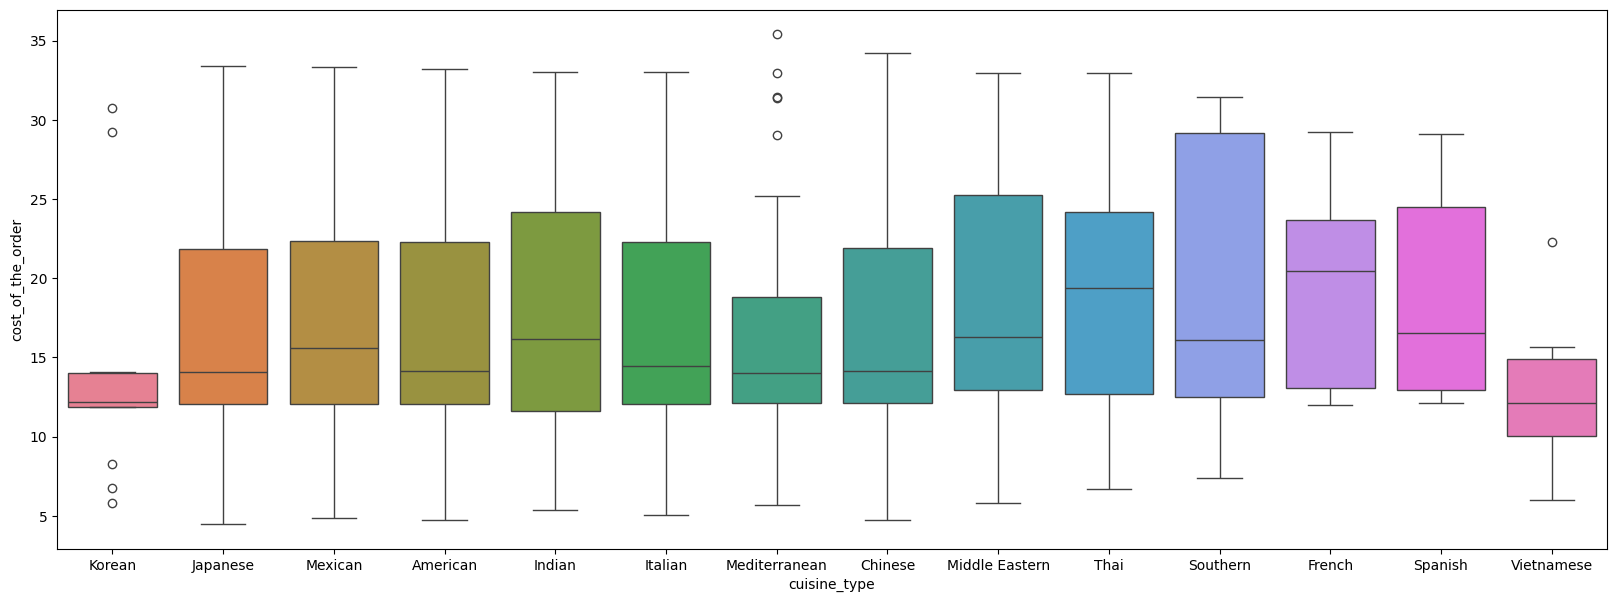

In [59]:
# box plot of cost of orders based on cuisine type
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='cuisine_type')
plt.show()

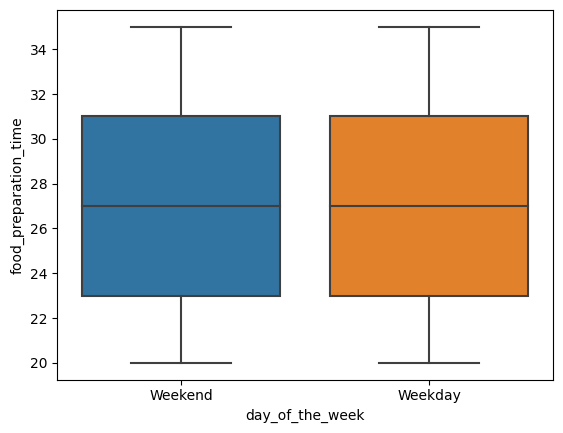

In [ ]:
# box plot of food prepation time based on day of the week
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time') ;

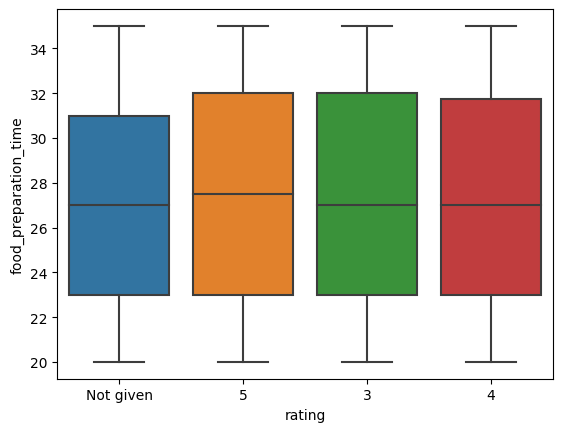

In [ ]:
# box plot of food prepation time based on rating
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.show()

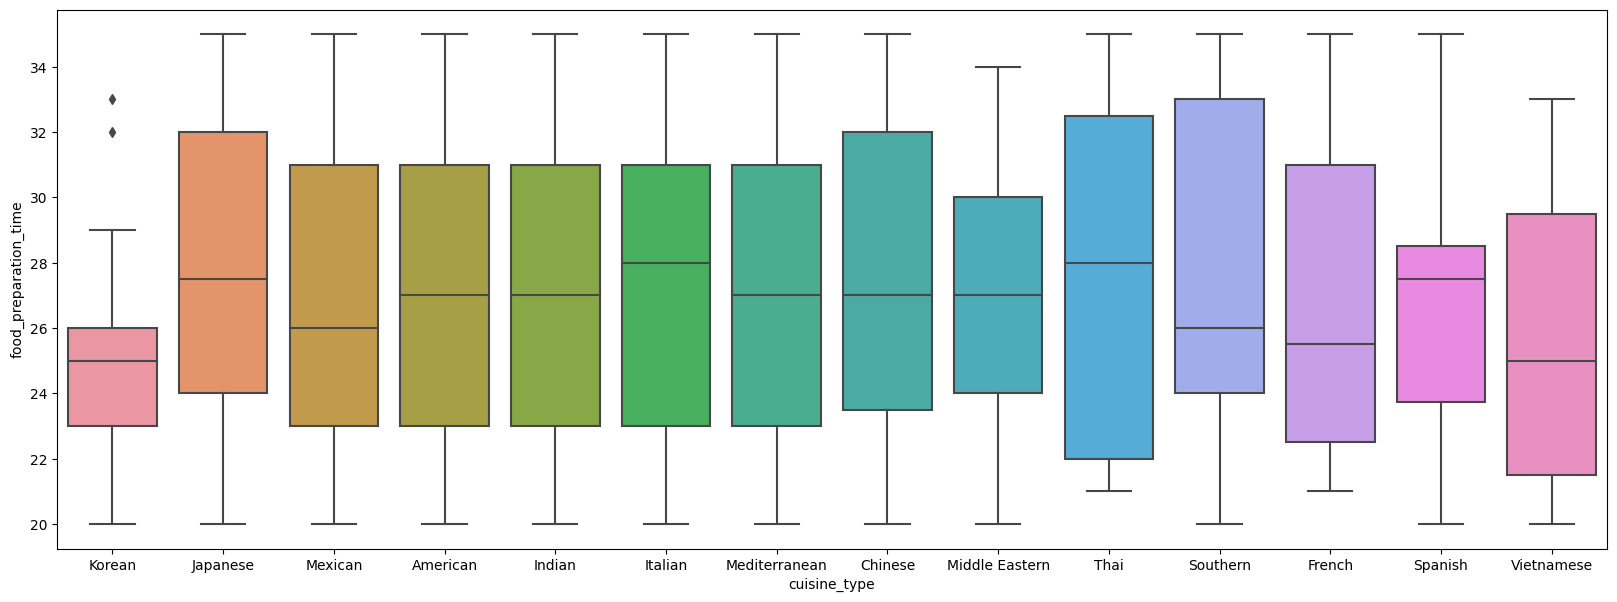

In [ ]:
# box plot of food prepation time based on cuisine type
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.show()

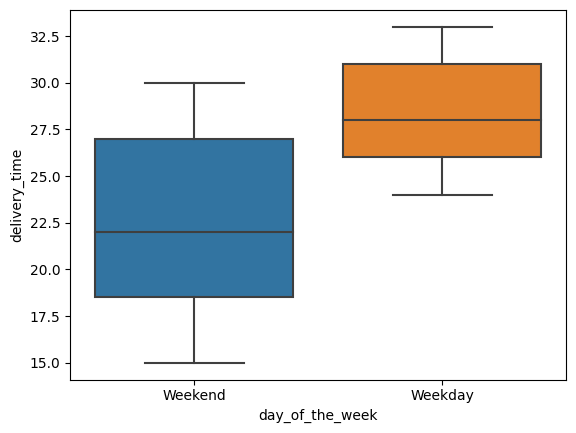

In [ ]:
# box plot of delivery time based on day of the week
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

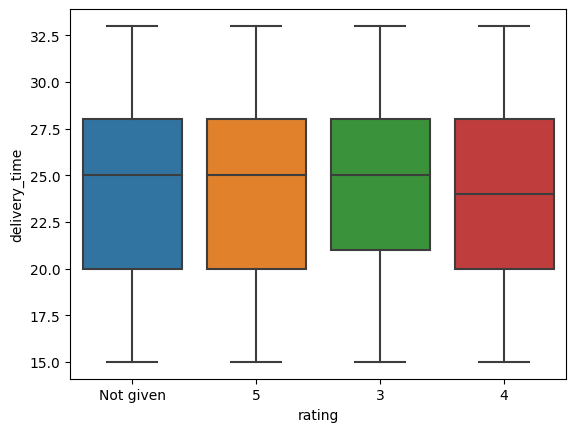

In [ ]:
# box plot of delivery time based on rating
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.show()

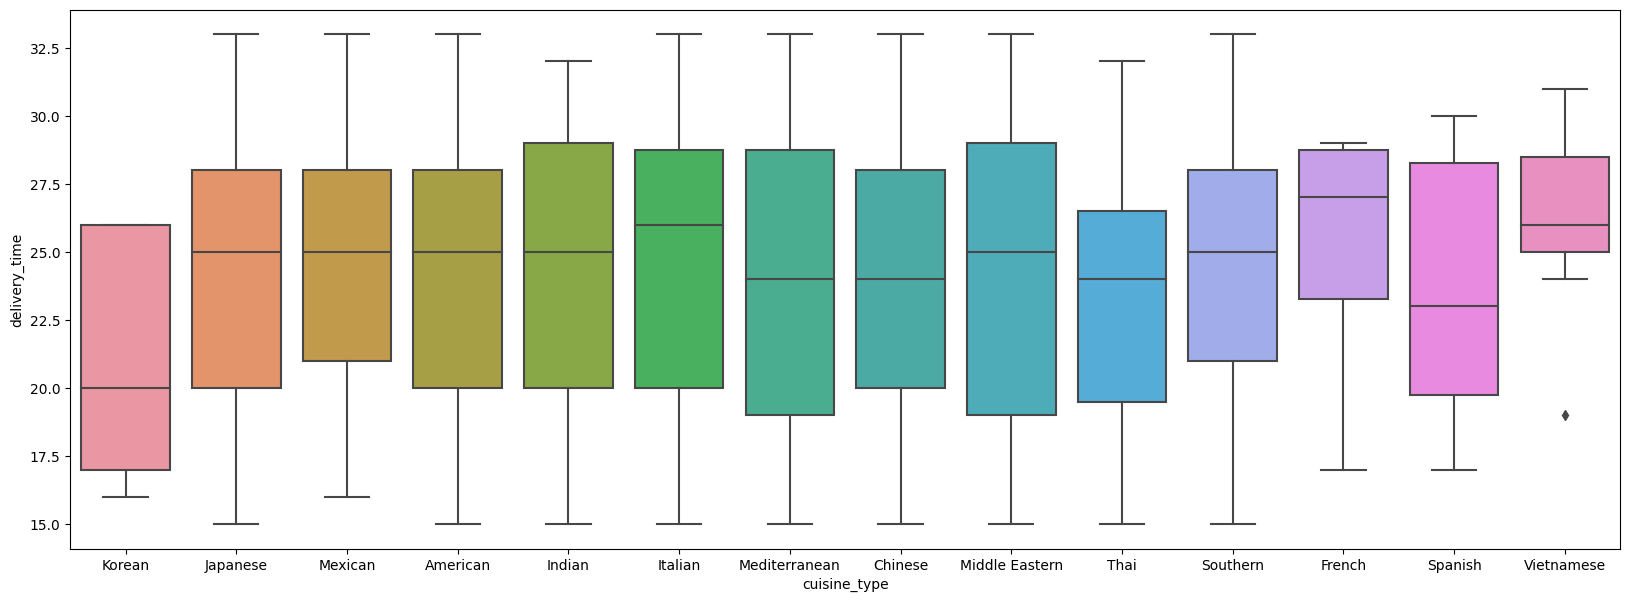

In [ ]:
# box plot of delivery time based on cuisine_type
plt.figure(figsize=(20,7))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.show()

### Calculate Net Revenue

Assumptions:
* 25% charge on orders with a cost greater than 20 dollars.
* 15% on orders with a cost greater than 5 dollars.

In [64]:
def Revenue(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

df['Revenue'] = df['cost_of_the_order'].apply(Revenue)
print('Total Revenue is equal to $',round(df['Revenue'].sum(),2))

Total Revenue is equal to $ 6166.3


In [65]:
# Percentage of orders that took longer than 60 minutes to deliver
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60_ratio = df [df['total_time']>60]['order_id'].nunique()/df['order_id'].nunique()
percentage = df_greater_than_60_ratio * 100
print('Percentage of orders that took longer than 60 minutes to deliver is: ',round(percentage,2),"%")

Percentage of orders that took longer than 60 minutes to deliver is:  10.54 %


In [69]:
# weekdays average delivery time
df_weekdays = df[df['day_of_the_week']=='Weekday']
print('weekdays average delivery time is:',(round(df_weekdays['delivery_time'].mean(),0)))

weekdays average delivery time is: 28.0


In [70]:
# weekend average delivery time
df_weekend = df[df['day_of_the_week']=='Weekend']
print('weekend average delivery time is:',round(df_weekend['delivery_time'].mean(),0))

weekend average delivery time is: 22.0


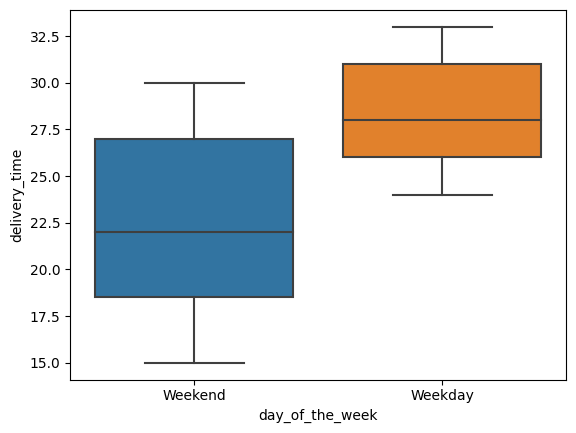

In [ ]:
# Compare the average delivery time distribution for weekdays versus weekends
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

### Conclusion and Recommendations

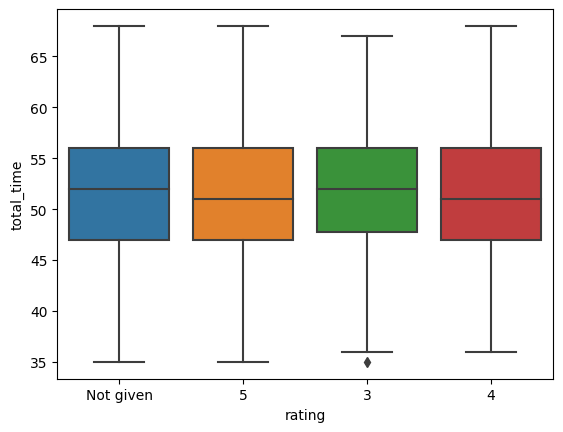

In [ ]:
# Box Plot of Rating Distribution
sns.boxplot(data=df, x='rating', y='total_time')
plt.show()

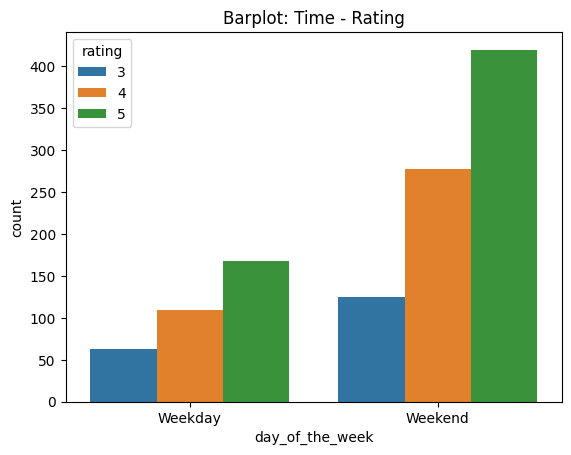

In [ ]:
# compare distribution of rating for weekdays vs weekends
plt.title('Barplot: Time - Rating')
sns.countplot(data=df_rated, x='day_of_the_week',hue='rating')
plt.show()

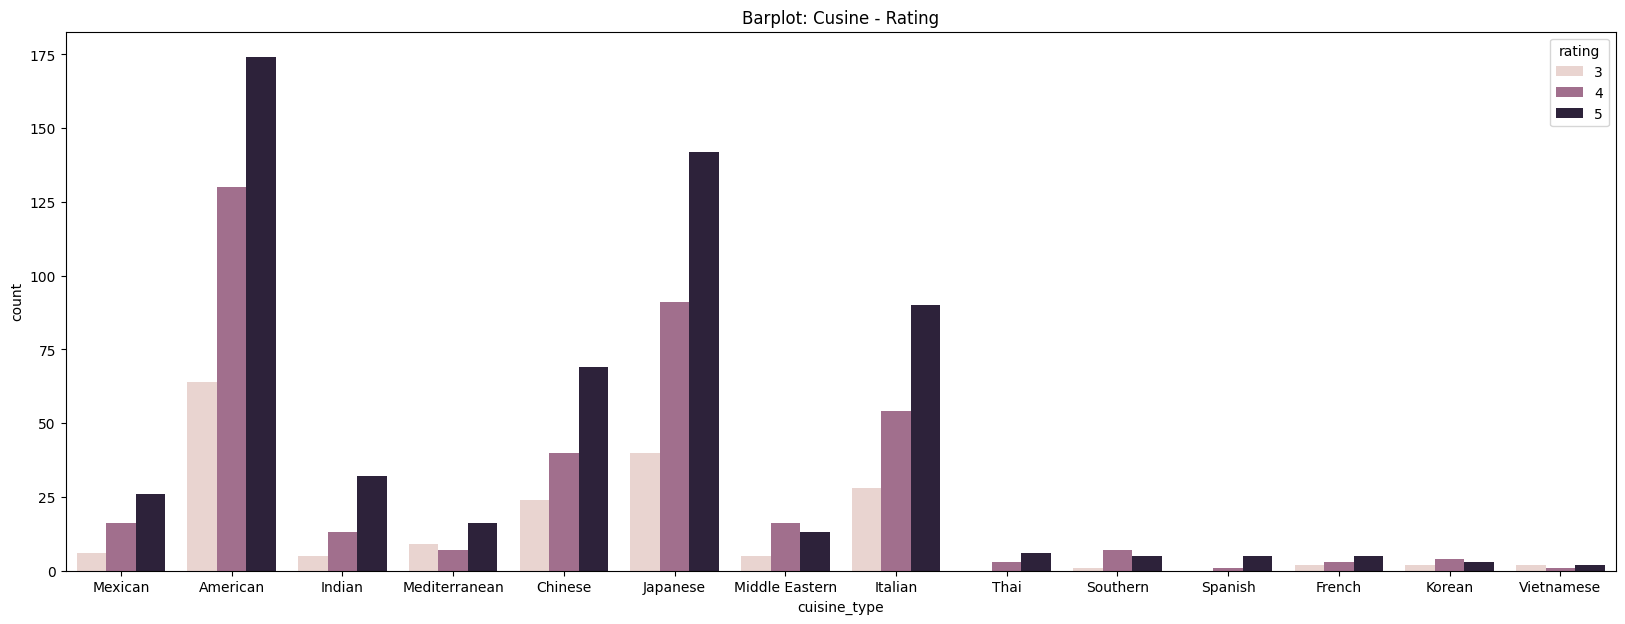

In [72]:
# compare distribution of ratings by cuisine type (include only orders that are rated)
plt.figure(figsize=(20,7))
plt.title('Barplot: Cusine - Rating')
sns.countplot(data=df_rated, x='cuisine_type',hue='rating')
plt.show()

In [73]:
df1 = df_rated.groupby('cuisine_type')['rating'].mean().to_frame().reset_index().sort_values(by= 'rating',ascending=False)
df2 = df_rated.groupby('cuisine_type')['order_id'].count().to_frame().reset_index().sort_values(by= 'order_id',ascending=False)
df3 = pd.merge(df1, df2, on='cuisine_type', how='inner')
new_names = ["Cuisine_Type", "Avg Rating", "Order_Count"]
df3 = df3.rename(columns=dict(zip(df3.columns, new_names)))
df3

,Cuisine_Type,Avg Rating,Order_Count
0,Spanish,4.833333,6
1,Thai,4.666667,9
2,Indian,4.540000,50
3,Mexican,4.416667,48
4,Japanese,4.373626,273
5,Italian,4.360465,172
6,Chinese,4.338346,133
7,Southern,4.307692,13
8,French,4.300000,10
9,American,4.298913,368


In [ ]:
# Assumption 1: Normality for Ratings
from scipy import stats
w, p_value = stats.shapiro(df_rated['rating'])
print('The p-value is', p_value)

The p-value is 2.253116551832119e-38


In [ ]:
# Assumption 2: Homogeneity of Variance for Ratings
from scipy.stats import levene
statistic, p_value = levene(df_rated['rating'][df_rated['cuisine_type'] == "Spanish"],
                            df_rated['rating'][df_rated['cuisine_type'] == "Thai"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Indian"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Mexican"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Japanese"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Italian"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Chinese"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Southern"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "French"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "American"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Middle Eastern"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Mediterranean"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Korean"],
                            df_rated['rating'][df_rated['cuisine_type'] ==  "Vietnamese"])
print('The p-value is', p_value)

The p-value is 0.41317700445619027


In [ ]:
from scipy.stats import f_oneway
# perform one-way Anova test
test_stat, p_value = f_oneway(df_rated['rating'][df_rated['cuisine_type'] == "Spanish"],
                              df_rated['rating'][df_rated['cuisine_type'] == "Thai"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Indian"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Mexican"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Japanese"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Italian"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Chinese"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Southern"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "French"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "American"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Middle Eastern"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Mediterranean"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Korean"],
                              df_rated['rating'][df_rated['cuisine_type'] ==  "Vietnamese"])
print('The p-value is ' + str(p_value))

The p-value is 0.38603418805612405


### Conclusions:
* Rating is not impacted by how long it takes for food to be prepared and delivered, and there is no impact from the cost on rating.
* Rating by cuisine type has a consistent distribution across the board. Some variation is noticeable, especially for cuisine types with fewer orders.
* Analysis of Variance has also ruled out a significant difference between the average rating by cuisine type.

### Recommendations:

* Understand the underlying reason for missing ratings. It is possible that no rating means a bad experience, and those missing data can reveal more details about customer preferences and their experience.
* Evaluate the quality of Middle Eastern, Southern, and Korean cuisines since the rating distribution for these cuisines is slightly different than others

---